In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Caminho para o arquivo GeoTiff segmentado
raster_path = '../dados/brasil_coverage_2022.tif'

# Carregar o arquivo GeoTiff
with rasterio.open(raster_path) as src:
    image = src.read(1)  # Ler a primeira banda da imagem
    meta = src.meta

# Exibir os metadados da imagem
print(meta)

# Verificar as classificações presentes no raster extraído
unique_classes = np.unique(image)
print("Classificações únicas na imagem:", unique_classes)

# Dicionário de classes (exemplo, ajuste conforme a documentação do MapBiomas)
class_dict = {
    1: 'Floresta',
    2: 'Savanas',
    3: 'Mangue',
    # Adicione mais classes conforme necessário
}

# Visualizar a imagem segmentada com legenda
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='tab20')  # Usar um colormap que suporta várias classes
cbar = plt.colorbar(ticks=unique_classes)
cbar.ax.set_yticklabels([class_dict.get(cls, 'Desconhecido') for cls in unique_classes])
plt.title('Mapa de Cobertura e Uso da Terra - 2022')
plt.show()

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 155239, 'height': 158459, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00026949458523585647, 0.0, -74.89739613957876,
       0.0, -0.00026949458523585647, 7.91209152793951)}


Classificações únicas na Caatinga extraída: [ 0  3  4  5  9 11 12 15 20 21 23 24 25 29 30 31 32 33 39 41 46 48 49 50
 62]


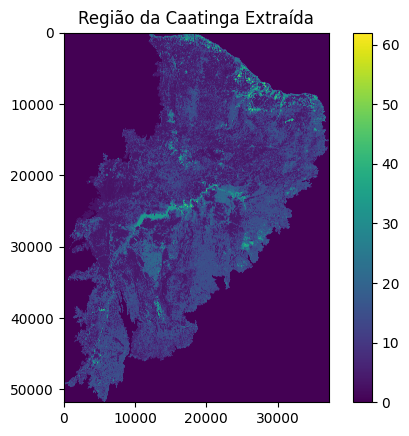

In [2]:
# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Caminho para o arquivo GeoTiff
raster_path = '../dados/brasil_coverage_2022.tif'

# Carregar o arquivo GeoTiff
with rasterio.open(raster_path) as src:
    # Aplicar máscara da Caatinga
    out_image, out_transform = mask(src, caatinga.geometry, crop=True)
    out_meta = src.meta.copy()

# Atualizar metadados
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Salvar o resultado em um novo GeoTiff
out_tiff = '../dados/caatinga_extracted.tif'
with rasterio.open(out_tiff, "w", **out_meta) as dest:
    dest.write(out_image)

# Verificar as classificações presentes no raster extraído
unique_classes = np.unique(out_image)
print("Classificações únicas na Caatinga extraída:", unique_classes)

# Visualizar a imagem extraída
plt.imshow(out_image[0], cmap='viridis')
plt.colorbar()
plt.title('Região da Caatinga Extraída')
plt.show()

Classificações únicas na Caatinga extraída: [ 0  3  4  5  9 11 12 15 20 21 23 24 25 29 30 31 32 33 39 41 46 48 49 50
 62]


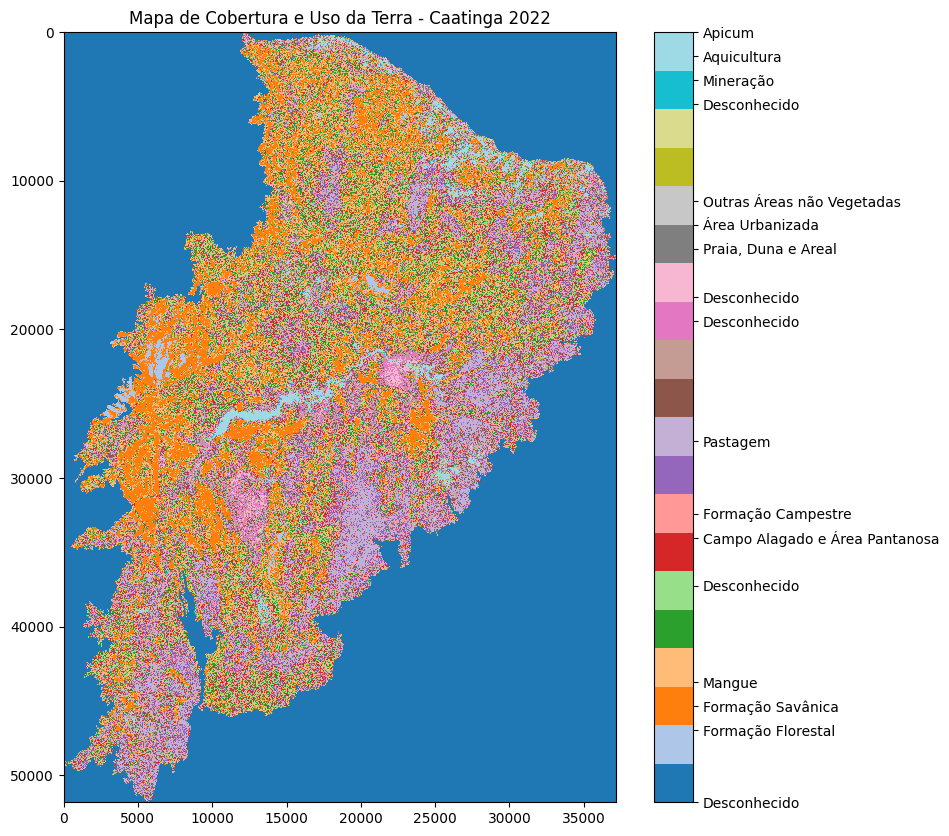

In [2]:
# Dicionário de classes baseado no PDF
class_dict = {
    1: 'Floresta',
    3: 'Formação Florestal',
    4: 'Formação Savânica',
    5: 'Mangue',
    6: 'Floresta Alagável',
    10: 'Formação Natural não Florestal',
    11: 'Campo Alagado e Área Pantanosa',
    12: 'Formação Campestre',
    13: 'Outras Formações não Florestais',
    14: 'Agropecuária',
    15: 'Pastagem',
    18: 'Agricultura',
    22: 'Área não Vegetada',
    23: 'Praia, Duna e Areal',
    24: 'Área Urbanizada',
    25: 'Outras Áreas não Vegetadas',
    26: 'Corpo D\'água',
    27: 'Não observado',
    30: 'Mineração',
    31: 'Aquicultura',
    32: 'Apicum',
    33: 'Rio, Lago e Oceano',
    36: 'Lavoura Perene',
    39: 'Soja',
    40: 'Arroz',
    41: 'Outras Lavouras Temporárias',
    46: 'Café',
    47: 'Citrus',
    48: 'Outras Lavouras Perenes',
    49: 'Restinga Arbórea',
    50: 'Restinga Herbácea',
    62: 'Algodão (beta)'
}

# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Caminho para o arquivo GeoTiff
raster_path = '../dados/brasil_coverage_2022.tif'

# Carregar o arquivo GeoTiff
with rasterio.open(raster_path) as src:
    # Aplicar máscara da Caatinga
    out_image, out_transform = mask(src, caatinga.geometry, crop=True)
    out_meta = src.meta.copy()

# Atualizar metadados
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Salvar o resultado em um novo GeoTiff
out_tiff = '../dados/caatinga_extracted.tif'
with rasterio.open(out_tiff, "w", **out_meta) as dest:
    dest.write(out_image)

# Verificar as classificações presentes no raster extraído
unique_classes = np.unique(out_image)

# Visualizar a imagem segmentada com legenda
plt.figure(figsize=(10, 10))
plt.imshow(out_image[0], cmap='tab20', vmin=0, vmax=len(class_dict))
cbar = plt.colorbar(ticks=unique_classes)
cbar.ax.set_yticklabels([class_dict.get(cls, 'Desconhecido') for cls in unique_classes])
plt.title('Mapa de Cobertura e Uso da Terra - Caatinga 2022')
plt.show()